In [99]:
import pandas as pd
from id3 import Id3Estimator
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from c45.c45 import C45
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [84]:
features = ["blue", "dual_sim", "four_g", "three_g", "wifi",'price_range','fc','int_memory','n_cores','talk_time','touch_screen']

In [85]:
mobile = pd.read_csv("./archive/train.csv",usecols=features)
train = mobile.drop(columns=["price_range"])
target = mobile['price_range']

In [115]:
x_train, x_test, y_train, y_test= train_test_split(train, target.values, test_size = 0.3, random_state= 42, shuffle=True)
kfold = KFold(n_splits = 2)

In [116]:
id3_clf = Id3Estimator()
testing_score = []
training_score = []
for train_index, test_index in kfold.split(x_train):
#     print(train_index)
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    id3_clf.fit(X_train,Y_train)
    temp_predicts = id3_clf.predict(x_train)
    training_score.append(accuracy_score(y_train, temp_predicts))
    train_predictions = id3_clf.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

C:\Users\eyimu\anaconda3\envs\mlweka\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\eyimu\anaconda3\envs\mlweka\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Dep

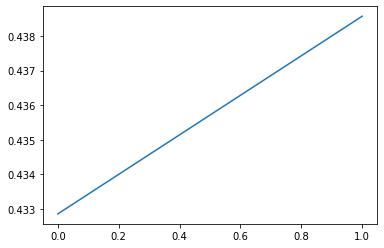

In [117]:
plt.plot(training_score)

<AxesSubplot:>

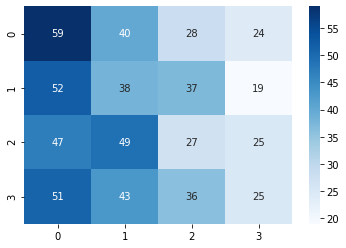

In [118]:
predictions = id3_clf.predict(x_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True, cmap = 'Blues')

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.28      0.39      0.33       151
           1       0.22      0.26      0.24       146
           2       0.21      0.18      0.20       148
           3       0.27      0.16      0.20       155

   micro avg       0.25      0.25      0.25       600
   macro avg       0.25      0.25      0.24       600
weighted avg       0.25      0.25      0.24       600



In [120]:
c45 = C45()
testing_score = []
training_score = []
# c45_predictions = cross_val_predict(c45, X_train, Y_train, cv=2)
for train_index, test_index in kfold.split(x_train):
#     print(train_index)
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    c45.fit(X_train,Y_train)
    temp_predicts = c45.predict(x_train)
    training_score.append(accuracy_score(y_train, temp_predicts))
    train_predictions = c45.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

C:\Users\eyimu\anaconda3\envs\mlweka\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\eyimu\anaconda3\envs\mlweka\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Dep

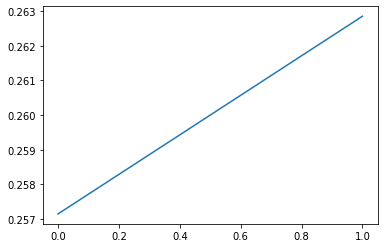

In [121]:
plt.plot(testing_score)

<AxesSubplot:>

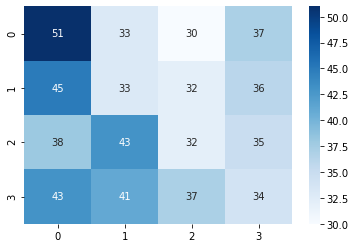

In [122]:
c45_predictions = c45.predict(x_test)
cm = confusion_matrix(y_test, c45_predictions)
sns.heatmap(cm,annot=True, cmap = 'Blues')

In [123]:
print(classification_report(y_test, c45_predictions))

              precision    recall  f1-score   support

           0       0.29      0.34      0.31       151
           1       0.22      0.23      0.22       146
           2       0.24      0.22      0.23       148
           3       0.24      0.22      0.23       155

   micro avg       0.25      0.25      0.25       600
   macro avg       0.25      0.25      0.25       600
weighted avg       0.25      0.25      0.25       600

